In [1]:
import os 
os.getcwd()

'C:\\Users\\Asus\\Pycharm Work'

In [2]:
os.chdir("D:\\DC Universe\\Ucsc\\Fourth Year\\Research\\URL Segmentation\\URL Classification Model")

In [3]:
import scipy
from scipy.io import arff
import numpy as np
import pandas as pd 
from sklearn import preprocessing
import seaborn as sns
df=pd.read_csv("All.csv")
df

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.000000,Defacement
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,Defacement
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,Defacement
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,Defacement
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam


In [5]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [7]:
df.URL_Type_obf_Type.value_counts()

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64

In [8]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Querylength                 0
domain_token_count          0
path_token_count            0
avgdomaintokenlen           0
longdomaintokenlen          0
                         ... 
Entropy_DirectoryName    8468
Entropy_Filename          236
Entropy_Extension          40
Entropy_Afterpath           6
URL_Type_obf_Type           0
Length: 80, dtype: int64

In [9]:
df.URL_Type_obf_Type.value_counts()

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64

In [10]:
df['Entropy_DirectoryName'].mean()

0.6774585199685779

In [11]:
df['Entropy_DirectoryName'].fillna('0.6774585199685779',inplace=True)

In [12]:
df['Entropy_Filename'].mean()

0.715833931542551

In [13]:
df['Entropy_Filename'].fillna('0.715833931542551',inplace=True)

In [14]:
df['Entropy_Extension'].mean()

0.5082122870595988

In [15]:
df['Entropy_Extension'].fillna('0.5082122870595986',inplace=True)

In [16]:
df['Entropy_Afterpath'].mean()

-0.2088996833661899

In [17]:
df['avgpathtokenlen'].fillna(0)

0        4.400000
1        6.000000
2        5.800000
3        5.500000
4        7.333334
           ...   
36702    3.666667
36703    8.461538
36704    3.375000
36705    3.600000
36706    3.250000
Name: avgpathtokenlen, Length: 36707, dtype: float64

In [18]:
df['NumberRate_Extension'].mean()

0.0375794056269783

In [19]:
df['NumberRate_Extension'].fillna('0.03757940562697829',inplace=True)

In [20]:
df['NumberRate_AfterPath'].value_counts()

-1.000000    20481
 0.000000     1791
 0.400000      662
 0.085106      451
 0.500000      315
             ...  
 0.045161        1
 0.293103        1
 0.195652        1
 0.189189        1
 0.145161        1
Name: NumberRate_AfterPath, Length: 1851, dtype: int64

In [21]:
df['NumberRate_AfterPath'].fillna(' 0.000000',inplace=True)

In [22]:
df['NumberRate_FileName'].fillna('0',inplace=True)

In [23]:
df['NumberRate_DirectoryName'].mean()

0.0037678746762322742

In [24]:
df['NumberRate_DirectoryName'].fillna('0.0037678746762322742',inplace=True)

In [25]:
df['avgpathtokenlen'].value_counts()

2.666667     4464
3.000000     1743
4.250000     1276
3.666667     1121
4.000000     1035
             ... 
4.047619        1
6.214286        1
12.125000       1
3.840000        1
3.640000        1
Name: avgpathtokenlen, Length: 835, dtype: int64

In [26]:
df['NumberRate_FileName'].fillna(' 0.000000',inplace=True)

In [27]:
df['avgpathtokenlen'].fillna('2.6666667',inplace=True)

In [30]:
df['avgpathtokenlen'].fillna('2.6666667',inplace=True)

In [31]:
df['Entropy_Afterpath'].fillna('0',inplace=True)

In [32]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Querylength              0
domain_token_count       0
path_token_count         0
avgdomaintokenlen        0
longdomaintokenlen       0
                        ..
Entropy_DirectoryName    0
Entropy_Filename         0
Entropy_Extension        0
Entropy_Afterpath        0
URL_Type_obf_Type        0
Length: 80, dtype: int64

In [33]:
df.corr()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,...,NumberRate_URL,NumberRate_Domain,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain
Querylength,1.000000,0.045174,0.004259,-0.056154,0.008193,0.045174,0.791216,0.844110,0.953382,-0.030022,...,0.104767,-0.055024,0.087773,0.045408,-0.054290,0.116514,0.110574,0.115224,-0.369418,0.001953
domain_token_count,0.045174,1.000000,-0.101013,-0.212984,0.068065,1.000000,0.001817,0.039905,0.053445,0.197289,...,0.073162,-0.014228,0.309859,0.998674,0.063383,0.109263,0.076454,0.084297,-0.012043,-0.503515
path_token_count,0.004259,-0.101013,1.000000,-0.105089,-0.099711,-0.101013,0.459537,0.373155,-0.033006,-0.049729,...,0.094793,-0.014094,0.603751,-0.100583,0.322220,0.400531,0.413817,0.459120,-0.580160,0.060732
avgdomaintokenlen,-0.056154,-0.212984,-0.105089,1.000000,0.895807,-0.212984,-0.084126,-0.074916,-0.049760,0.089185,...,-0.149779,-0.148993,-0.111782,-0.213186,-0.054210,-0.056301,-0.030137,-0.022116,-0.144895,-0.220215
longdomaintokenlen,0.008193,0.068065,-0.099711,0.895807,1.000000,0.068065,-0.023848,-0.006579,0.011607,0.120057,...,-0.119601,-0.183103,0.020736,0.065447,-0.039765,0.021979,0.041137,0.040299,-0.176775,-0.366726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SymbolCount_FileName,0.116514,0.109263,0.400531,-0.056301,0.021979,0.109263,0.303838,0.239746,0.005754,-0.025331,...,0.046811,-0.012018,0.821909,0.109693,-0.207923,1.000000,0.967373,0.930966,-0.216773,-0.118435
SymbolCount_Extension,0.110574,0.076454,0.413817,-0.030137,0.041137,0.076454,0.309776,0.244214,0.004120,-0.025015,...,0.040096,-0.035796,0.797228,0.076995,-0.213848,0.967373,1.000000,0.899230,-0.243439,-0.108296
SymbolCount_Afterpath,0.115224,0.084297,0.459120,-0.022116,0.040299,0.084297,0.302103,0.230076,-0.004670,-0.023577,...,0.030044,0.000102,0.821774,0.084701,-0.132727,0.930966,0.899230,1.000000,-0.227871,-0.127094
Entropy_URL,-0.369418,-0.012043,-0.580160,-0.144895,-0.176775,-0.012043,-0.688249,-0.638226,-0.331338,0.019441,...,0.097978,0.200391,-0.349182,-0.011950,-0.231295,-0.216773,-0.243439,-0.227871,1.000000,0.091572


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Querylength', ylabel='Density'>

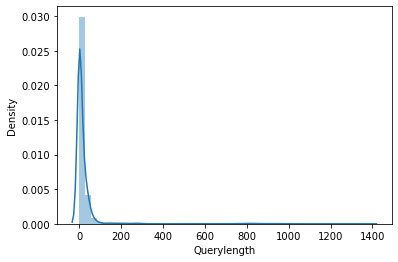

In [35]:
sns.distplot(df['Querylength'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='domain_token_count', ylabel='Density'>

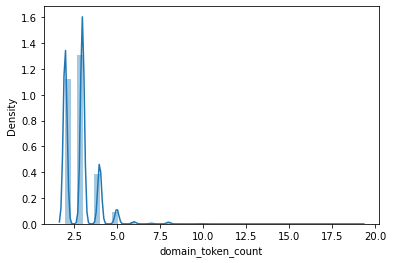

In [36]:
sns.distplot(df['domain_token_count'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='path_token_count', ylabel='Density'>

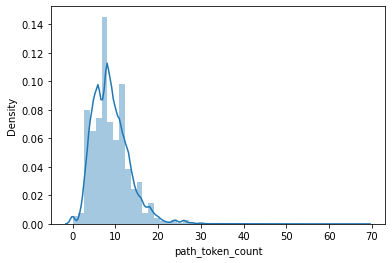

In [37]:
sns.distplot(df['path_token_count'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avgdomaintokenlen', ylabel='Density'>

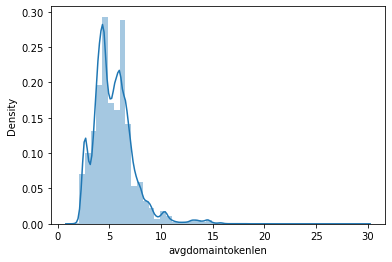

In [38]:
sns.distplot(df['avgdomaintokenlen'])

In [40]:
df["Entropy_Afterpath"]= df["Entropy_Afterpath"].astype(float) 
df["Entropy_Extension"]= df["Entropy_Extension"].astype(float) 
  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_Afterpath', ylabel='Density'>

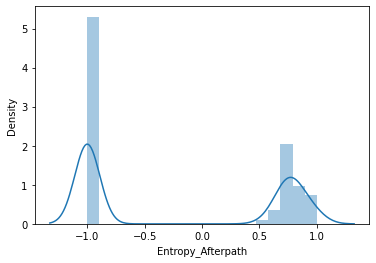

In [41]:
sns.distplot(df['Entropy_Afterpath'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_Extension', ylabel='Density'>

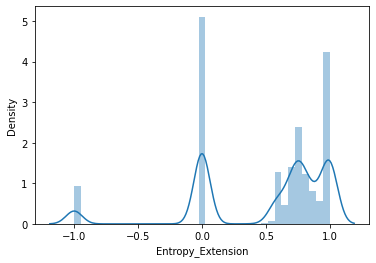

In [42]:
sns.distplot(df['Entropy_Extension'])

In [43]:
df["Entropy_Filename"]= df["Entropy_Filename"].astype(float) 
df["Entropy_DirectoryName"]= df["Entropy_DirectoryName"].astype(float) 
  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_Filename', ylabel='Density'>

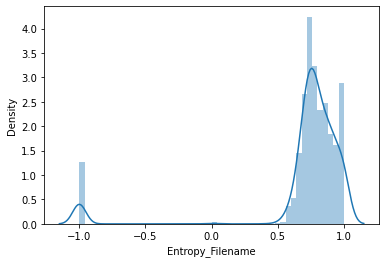

In [45]:
sns.distplot(df['Entropy_Filename'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_DirectoryName', ylabel='Density'>

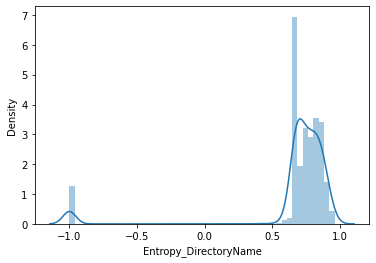

In [46]:
sns.distplot(df['Entropy_DirectoryName'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_Domain', ylabel='Density'>

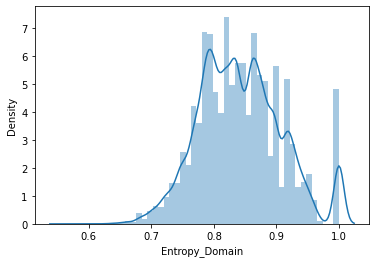

In [47]:


sns.distplot(df['Entropy_Domain'])

In [48]:
df["NumberRate_AfterPath"]= df["NumberRate_AfterPath"].astype(float) 
df["Entropy_URL"]= df["Entropy_URL"].astype(float) 
df["Entropy_Extension"]= df["Entropy_Extension"].astype(float) 
df["Entropy_Filename"]= df["Entropy_Filename"].astype(float) 
df["Entropy_DirectoryName"]= df["Entropy_DirectoryName"].astype(float) 
df["Entropy_Domain"]= df["Entropy_Domain"].astype(float) 
df["Entropy_URL"]= df["Entropy_URL"].astype(float) 
df["NumberRate_URL"]= df["NumberRate_URL"].astype(float) 
df["NumberRate_Domain"]= df["NumberRate_Domain"].astype(float) 
df["NumberRate_DirectoryName"]= df["NumberRate_DirectoryName"].astype(float) 
df["NumberRate_FileName"]= df["NumberRate_FileName"].astype(float) 
df["NumberRate_Extension"]= df["NumberRate_AfterPath"].astype(float)
df["NumberRate_AfterPath"]= df["NumberRate_AfterPath"].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Entropy_URL', ylabel='Density'>

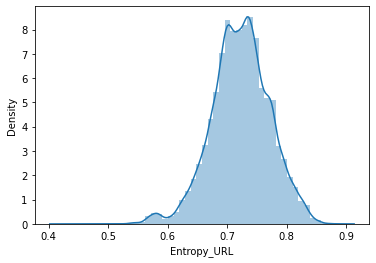

In [49]:
sns.distplot(df['Entropy_URL'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Afterpath', ylabel='Density'>

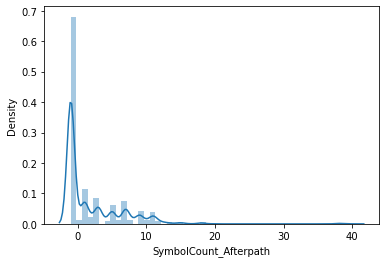

In [50]:
sns.distplot(df['SymbolCount_Afterpath'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Extension', ylabel='Density'>

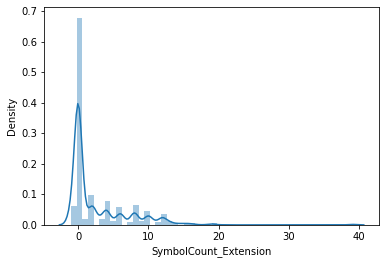

In [51]:
sns.distplot(df['SymbolCount_Extension'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_FileName', ylabel='Density'>

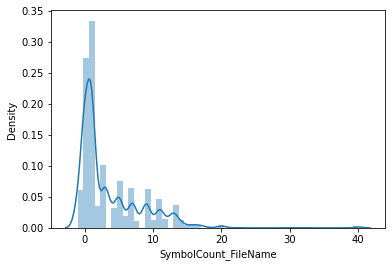

In [52]:
sns.distplot(df['SymbolCount_FileName'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Directoryname', ylabel='Density'>

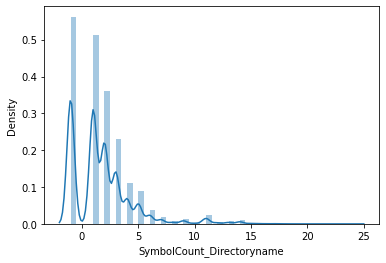

In [53]:
sns.distplot(df['SymbolCount_Directoryname'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_Domain', ylabel='Density'>

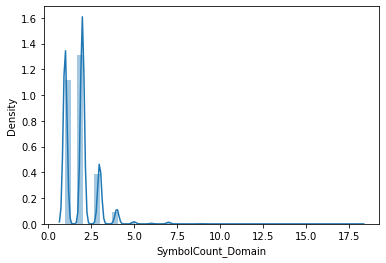

In [54]:
sns.distplot(df['SymbolCount_Domain'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SymbolCount_URL', ylabel='Density'>

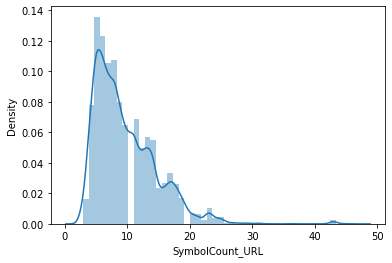

In [55]:
sns.distplot(df['SymbolCount_URL'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_AfterPath', ylabel='Density'>

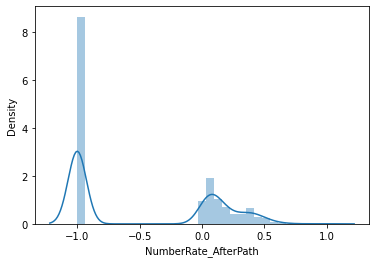

In [56]:
sns.distplot(df['NumberRate_AfterPath'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_Extension', ylabel='Density'>

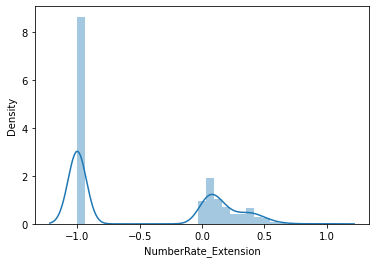

In [57]:
sns.distplot(df['NumberRate_Extension'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_FileName', ylabel='Density'>

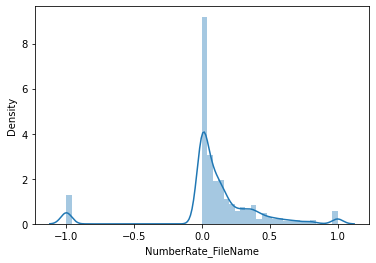

In [58]:
sns.distplot(df['NumberRate_FileName'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_DirectoryName', ylabel='Density'>

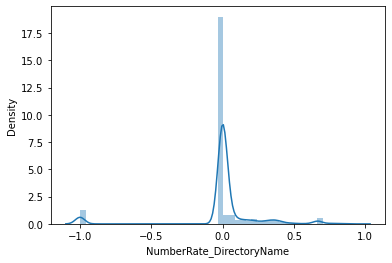

In [59]:
sns.distplot(df['NumberRate_DirectoryName'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_Domain', ylabel='Density'>

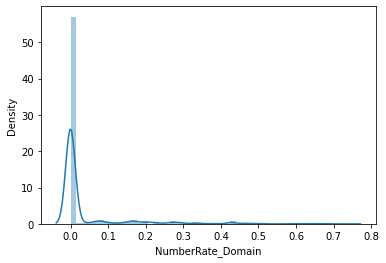

In [60]:
sns.distplot(df['NumberRate_Domain'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRate_URL', ylabel='Density'>

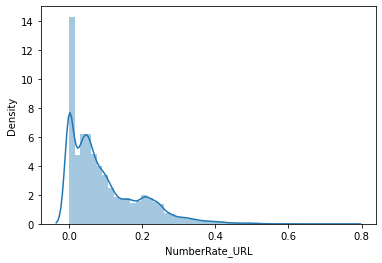

In [61]:
sns.distplot(df['NumberRate_URL'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delimeter_Count', ylabel='Density'>

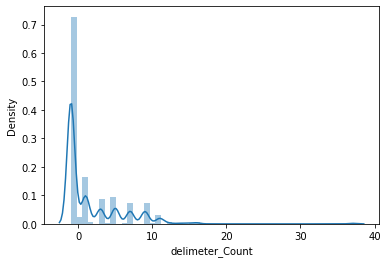

In [62]:
sns.distplot(df['delimeter_Count'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delimeter_path', ylabel='Density'>

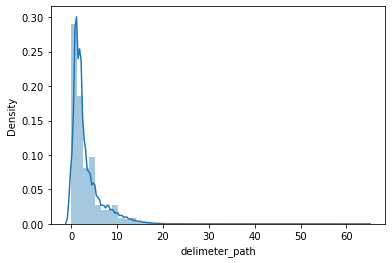

In [63]:
sns.distplot(df['delimeter_path'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spcharUrl', ylabel='Density'>

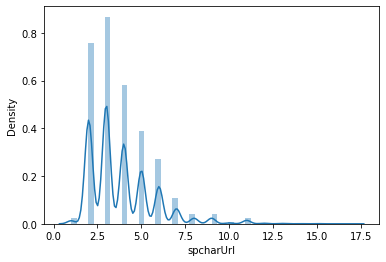

In [64]:
sns.distplot(df['spcharUrl'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URLQueries_variable', ylabel='Density'>

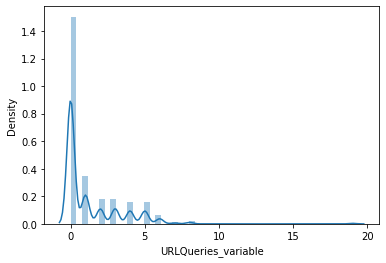

In [65]:
sns.distplot(df['URLQueries_variable'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URL_sensitiveWord', ylabel='Density'>

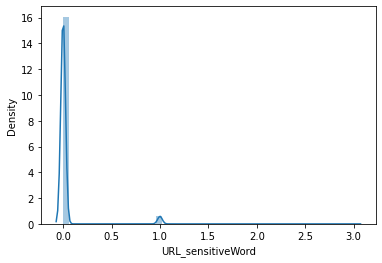

In [66]:
sns.distplot(df['URL_sensitiveWord'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arguments_LongestWordLength', ylabel='Density'>

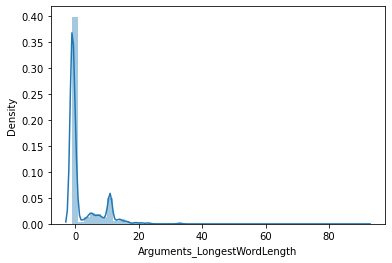

In [67]:
sns.distplot(df['Arguments_LongestWordLength'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sub-Directory_LongestWordLength', ylabel='Density'>

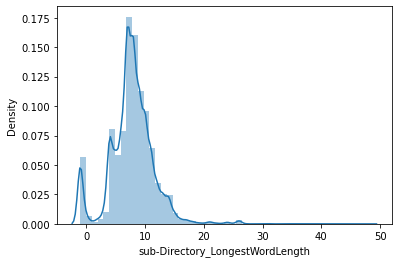

In [68]:

sns.distplot(df['sub-Directory_LongestWordLength'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Path_LongestWordLength', ylabel='Density'>

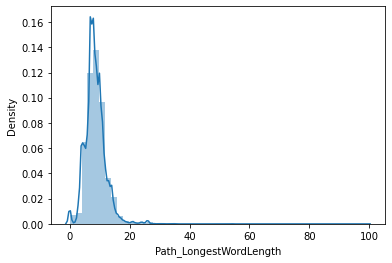

In [69]:
sns.distplot(df['Path_LongestWordLength'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Domain_LongestWordLength', ylabel='Density'>

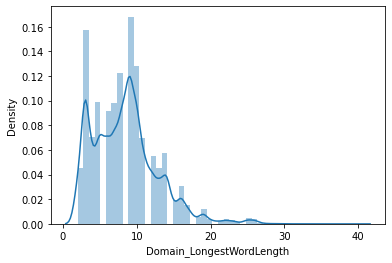

In [70]:
sns.distplot(df['Domain_LongestWordLength'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LongestPathTokenLength', ylabel='Density'>

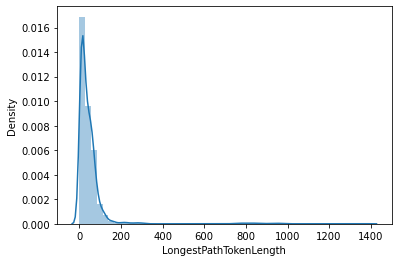

In [71]:

sns.distplot(df['LongestPathTokenLength'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Query_LetterCount', ylabel='Density'>

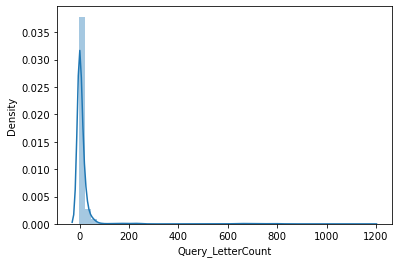

In [72]:
sns.distplot(df['Query_LetterCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Extension_LetterCount', ylabel='Density'>

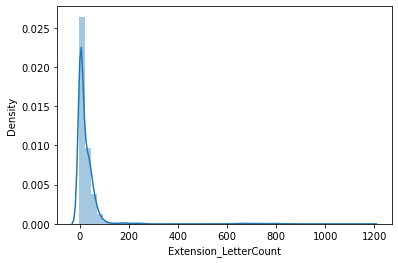

In [73]:
sns.distplot(df['Extension_LetterCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Directory_LetterCount', ylabel='Density'>

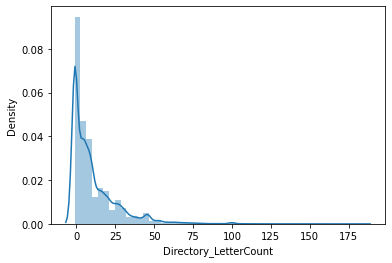

In [74]:
sns.distplot(df['Directory_LetterCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_letter_count', ylabel='Density'>

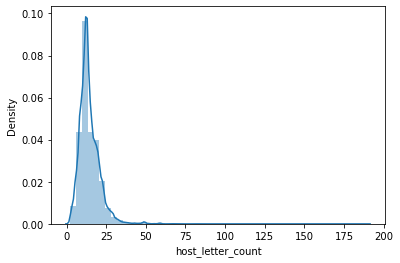

In [75]:
sns.distplot(df['host_letter_count'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URL_Letter_Count', ylabel='Density'>

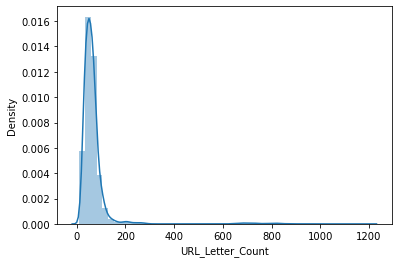

In [76]:
sns.distplot(df['URL_Letter_Count'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Query_DigitCount', ylabel='Density'>

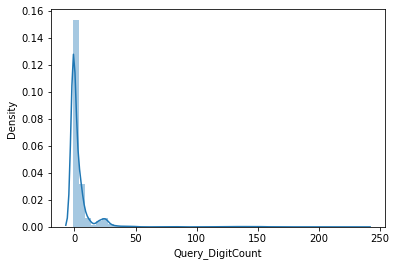

In [77]:
sns.distplot(df['Query_DigitCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Extension_DigitCount', ylabel='Density'>

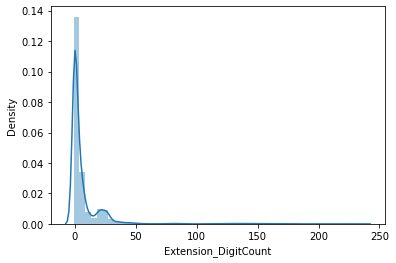

In [78]:
sns.distplot(df['Extension_DigitCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Filename_LetterCount', ylabel='Density'>

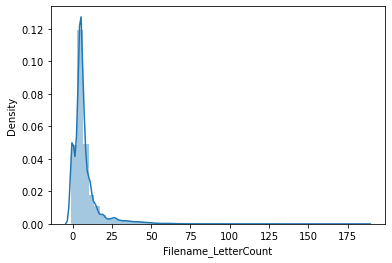

In [79]:
sns.distplot(df['Filename_LetterCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Directory_DigitCount', ylabel='Density'>

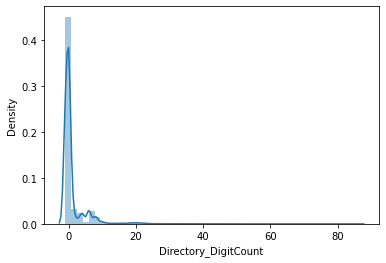

In [80]:
sns.distplot(df['Directory_DigitCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_DigitCount', ylabel='Density'>

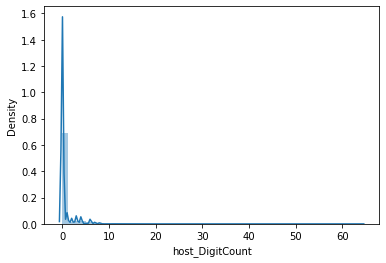

In [81]:
sns.distplot(df['host_DigitCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='URL_DigitCount', ylabel='Density'>

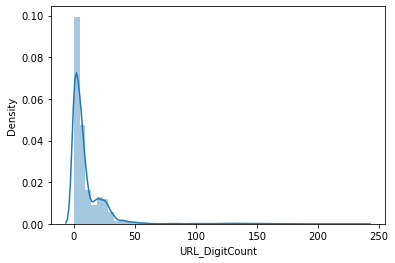

In [82]:
sns.distplot(df['URL_DigitCount'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LongestVariableValue', ylabel='Density'>

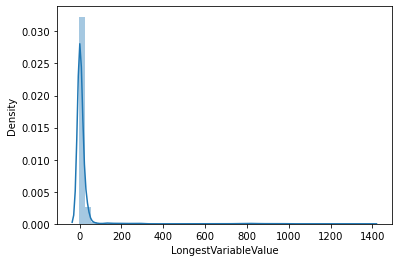

In [83]:
sns.distplot(df['LongestVariableValue'])

In [84]:
df.drop(["Querylength", "domain_token_count",
        "avgpathtokenlen", "tld", "ldl_url", "ldl_domain", "ldl_path",
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg',  'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen',
       'ArgUrlRatio', 'argDomanRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Path_LongestWordLength',
       'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
       'URL_sensitiveWord', 'URLQueries_variable', 'spcharUrl',
       'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 'NumberRate_Domain', 'NumberRate_DirectoryName',
       'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_Domain', 'SymbolCount_Directoryname',
       'SymbolCount_FileName', 'SymbolCount_Extension',
       'SymbolCount_Afterpath', 'Entropy_Domain',
       'Entropy_DirectoryName', 'Entropy_Extension',
       'Entropy_Afterpath'],axis=1,inplace = True) 
  

In [85]:
df

,path_token_count,avgdomaintokenlen,longdomaintokenlen,charcompvowels,charcompace,urlLen,pathurlRatio,domainUrlRatio,Domain_LongestWordLength,NumberRate_URL,SymbolCount_URL,Entropy_URL,Entropy_Filename,URL_Type_obf_Type
0,5,5.500000,14,8,3,58,0.448276,0.431034,14,0.017241,8,0.726298,0.850608,Defacement
1,5,5.500000,14,12,4,66,0.515151,0.378788,14,0.000000,8,0.688635,0.859793,Defacement
2,5,5.500000,14,12,5,65,0.507692,0.384615,14,0.000000,8,0.695049,0.801880,Defacement
3,12,5.500000,14,32,16,109,0.706422,0.229358,14,0.000000,8,0.640130,0.663210,Defacement
4,6,5.500000,14,18,11,81,0.604938,0.308642,14,0.000000,8,0.681307,0.804526,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,14,5.750000,12,20,24,146,0.773973,0.178082,12,0.212329,19,0.690555,0.690227,spam
36703,13,3.750000,8,24,23,147,0.829932,0.122449,8,0.142857,23,0.665492,0.674400,spam
36704,27,6.666666,16,41,34,246,0.882114,0.089431,16,0.231707,26,0.656807,0.713622,spam
36705,13,4.333334,9,15,13,116,0.810345,0.129310,9,0.215517,14,0.725963,0.745932,spam


In [86]:
df.corr()

,path_token_count,avgdomaintokenlen,longdomaintokenlen,charcompvowels,charcompace,urlLen,pathurlRatio,domainUrlRatio,Domain_LongestWordLength,NumberRate_URL,SymbolCount_URL,Entropy_URL,Entropy_Filename
path_token_count,1.000000,-0.105089,-0.099711,0.459537,0.373155,0.204589,0.691932,-0.637183,-0.047193,0.094793,0.603751,-0.580160,-0.229194
avgdomaintokenlen,-0.105089,1.000000,0.895807,-0.084126,-0.074916,-0.037073,-0.332215,0.422877,0.739282,-0.149779,-0.111782,-0.144895,-0.050708
longdomaintokenlen,-0.099711,0.895807,1.000000,-0.023848,-0.006579,0.039711,-0.352215,0.475758,0.779206,-0.119601,0.020736,-0.176775,-0.036367
charcompvowels,0.459537,-0.084126,-0.023848,1.000000,0.946030,0.891775,0.626943,-0.554134,0.023518,0.030934,0.350203,-0.688249,-0.129446
charcompace,0.373155,-0.074916,-0.006579,0.946030,1.000000,0.934357,0.572030,-0.499105,0.043818,0.139185,0.318937,-0.638226,-0.099604
urlLen,0.204589,-0.037073,0.039711,0.891775,0.934357,1.000000,0.446208,-0.375791,0.064431,0.174589,0.218055,-0.525741,-0.092201
pathurlRatio,0.691932,-0.332215,-0.352215,0.626943,0.572030,0.446208,1.000000,-0.977616,-0.237414,0.297699,0.431237,-0.523645,-0.105900
domainUrlRatio,-0.637183,0.422877,0.475758,-0.554134,-0.499105,-0.375791,-0.977616,1.000000,0.332968,-0.278712,-0.352505,0.419489,0.077282
Domain_LongestWordLength,-0.047193,0.739282,0.779206,0.023518,0.043818,0.064431,-0.237414,0.332968,1.000000,-0.156932,0.013643,-0.214472,0.005274
NumberRate_URL,0.094793,-0.149779,-0.119601,0.030934,0.139185,0.174589,0.297699,-0.278712,-0.156932,1.000000,0.155287,0.097978,-0.116567


In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle.URL_Type_obf_Type=le.fit_transform(df.URL_Type_obf_Type)
df

,path_token_count,avgdomaintokenlen,longdomaintokenlen,charcompvowels,charcompace,urlLen,pathurlRatio,domainUrlRatio,Domain_LongestWordLength,NumberRate_URL,SymbolCount_URL,Entropy_URL,Entropy_Filename,URL_Type_obf_Type
0,5,5.500000,14,8,3,58,0.448276,0.431034,14,0.017241,8,0.726298,0.850608,0
1,5,5.500000,14,12,4,66,0.515151,0.378788,14,0.000000,8,0.688635,0.859793,0
2,5,5.500000,14,12,5,65,0.507692,0.384615,14,0.000000,8,0.695049,0.801880,0
3,12,5.500000,14,32,16,109,0.706422,0.229358,14,0.000000,8,0.640130,0.663210,0
4,6,5.500000,14,18,11,81,0.604938,0.308642,14,0.000000,8,0.681307,0.804526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,14,5.750000,12,20,24,146,0.773973,0.178082,12,0.212329,19,0.690555,0.690227,4
36703,13,3.750000,8,24,23,147,0.829932,0.122449,8,0.142857,23,0.665492,0.674400,4
36704,27,6.666666,16,41,34,246,0.882114,0.089431,16,0.231707,26,0.656807,0.713622,4
36705,13,4.333334,9,15,13,116,0.810345,0.129310,9,0.215517,14,0.725963,0.745932,4


In [88]:
cor=df.corr()

<AxesSubplot:>

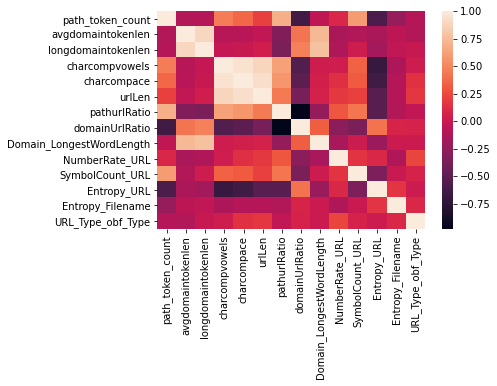

In [89]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns)

In [90]:
df.cov()

,path_token_count,avgdomaintokenlen,longdomaintokenlen,charcompvowels,charcompace,urlLen,pathurlRatio,domainUrlRatio,Domain_LongestWordLength,NumberRate_URL,SymbolCount_URL,Entropy_URL,Entropy_Filename,URL_Type_obf_Type
path_token_count,18.304761,-0.893322,-2.071831,26.249821,17.315442,83.416988,0.472239,-0.355274,-0.888711,0.038843,13.056556,-0.121179,-0.402418,-0.549680
avgdomaintokenlen,-0.893322,3.947606,8.643938,-2.231613,-1.614360,-7.019726,-0.105294,0.109496,6.465100,-0.028502,-1.122605,-0.014055,-0.041346,-0.306137
longdomaintokenlen,-2.071831,8.643938,23.586365,-1.546339,-0.346514,18.379447,-0.272869,0.301116,16.656379,-0.055632,0.509035,-0.041913,-0.072482,-0.078008
charcompvowels,26.249821,-2.231613,-1.546339,178.257608,136.990609,1134.672883,1.335267,-0.964174,1.382055,0.039556,23.633766,-0.448607,-0.709259,0.462501
charcompace,17.315442,-1.614360,-0.346514,136.990609,117.631519,965.752328,0.989683,-0.705458,2.091751,0.144580,17.484579,-0.337935,-0.443334,2.229190
urlLen,83.416988,-7.019726,18.379447,1134.672883,965.752328,9082.015969,6.783355,-4.667183,27.026020,1.593546,105.037906,-2.446017,-3.605929,23.246705
pathurlRatio,0.472239,-0.105294,-0.272869,1.335267,0.989683,6.783355,0.025447,-0.020324,-0.166694,0.004548,0.347713,-0.004078,-0.006933,-0.008103
domainUrlRatio,-0.355274,0.109496,0.301116,-0.964174,-0.705458,-4.667183,-0.020324,0.016984,0.190993,-0.003479,-0.232205,0.002669,0.004133,0.012647
Domain_LongestWordLength,-0.888711,6.465100,16.656379,1.382055,2.091751,27.026020,-0.166694,0.190993,19.372964,-0.066155,0.303518,-0.046086,0.009527,0.032295
NumberRate_URL,0.038843,-0.028502,-0.055632,0.039556,0.144580,1.593546,0.004548,-0.003479,-0.066155,0.009173,0.075176,0.000458,-0.004582,0.031422


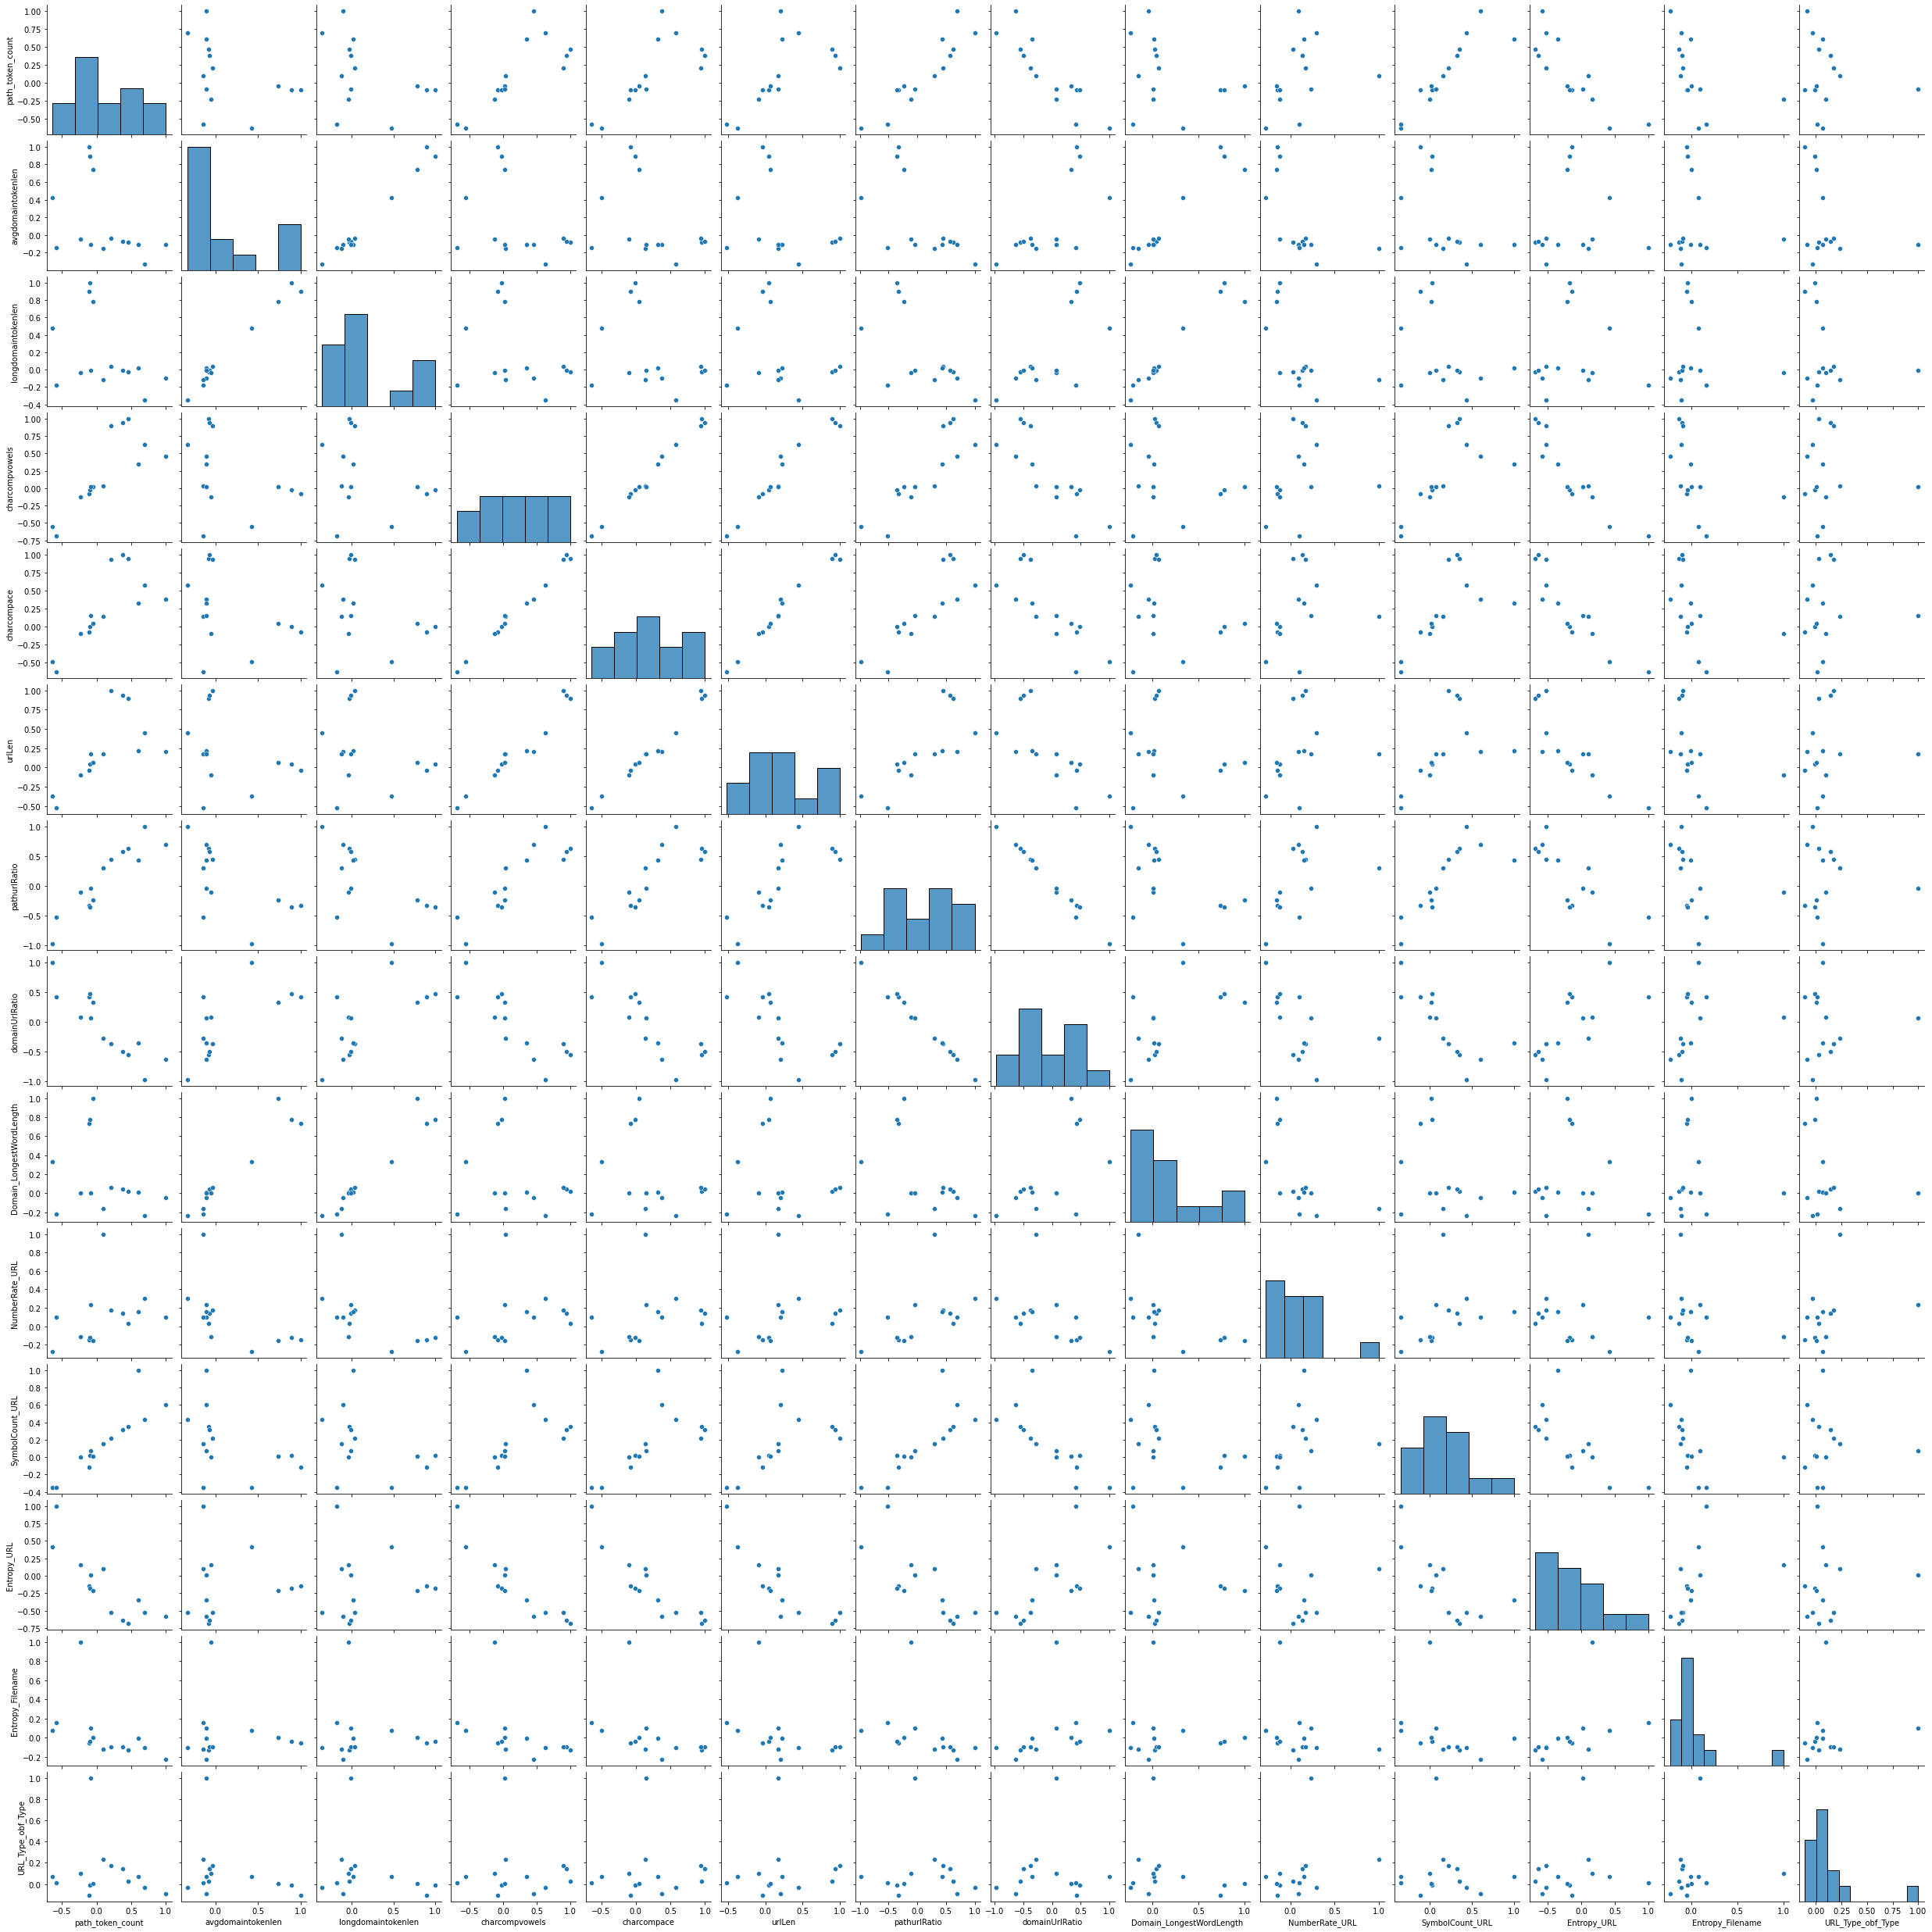

In [91]:
import seaborn as sns
sns.pairplot(cor)

In [92]:
Z=df.iloc[:,1:13]

In [93]:
Z

,avgdomaintokenlen,longdomaintokenlen,charcompvowels,charcompace,urlLen,pathurlRatio,domainUrlRatio,Domain_LongestWordLength,NumberRate_URL,SymbolCount_URL,Entropy_URL,Entropy_Filename
0,5.500000,14,8,3,58,0.448276,0.431034,14,0.017241,8,0.726298,0.850608
1,5.500000,14,12,4,66,0.515151,0.378788,14,0.000000,8,0.688635,0.859793
2,5.500000,14,12,5,65,0.507692,0.384615,14,0.000000,8,0.695049,0.801880
3,5.500000,14,32,16,109,0.706422,0.229358,14,0.000000,8,0.640130,0.663210
4,5.500000,14,18,11,81,0.604938,0.308642,14,0.000000,8,0.681307,0.804526
...,...,...,...,...,...,...,...,...,...,...,...,...
36702,5.750000,12,20,24,146,0.773973,0.178082,12,0.212329,19,0.690555,0.690227
36703,3.750000,8,24,23,147,0.829932,0.122449,8,0.142857,23,0.665492,0.674400
36704,6.666666,16,41,34,246,0.882114,0.089431,16,0.231707,26,0.656807,0.713622
36705,4.333334,9,15,13,116,0.810345,0.129310,9,0.215517,14,0.725963,0.745932


In [94]:
y=df.iloc[:,0]

In [95]:
y

0         5
1         5
2         5
3        12
4         6
         ..
36702    14
36703    13
36704    27
36705    13
36706    25
Name: path_token_count, Length: 36707, dtype: int64

# Stats model 

In [96]:
x=df[['path_token_count','avgdomaintokenlen','Entropy_URL','charcompvowels','charcompace','pathurlRatio','domainUrlRatio','SymbolCount_URL']]

In [97]:
T=df[['SymbolCount_URL','Entropy_URL','pathurlRatio']]

In [98]:
A=df["avgdomaintokenlen"]

In [99]:
import statsmodels.api as sm
model1=sm.OLS(y,A).fit()

In [100]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                          8.204e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:20   Log-Likelihood:                     -1.1478e+05
No. Observations:               36707   AIC:                                  2.296e+05
Df Residuals:                   36706   BIC:                                  2.296e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
avgdomaintokenlen     1.4332      0.005    286.428      0.000       1.423       1.443
==============================================================================
Omnibus:                     2405.693   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11603.864
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                       5.751   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
B=df["longdomaintokenlen"]
model2=sm.OLS(y,B).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.622
Method:                 Least Squares   F-statistic:                          6.030e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:21   Log-Likelihood:                     -1.1849e+05
No. Observations:               36707   AIC:                                  2.370e+05
Df Residuals:                   36706   BIC:                                  2.370e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longdomaintokenlen     0.7186      0.003    245.557      0.000       0.713       0.724
==============================================================================
Omnibus:                     3548.979   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20256.585
Skew:                          -0.289   Prob(JB):                         0.00
Kurtosis:                       6.593   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
C=df["charcompvowels"]
model3=sm.OLS(y,C).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                          6.775e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:29   Log-Likelihood:                     -1.1713e+05
No. Observations:               36707   AIC:                                  2.343e+05
Df Residuals:                   36706   BIC:                                  2.343e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
charcompvowels     0.3984      0.002    260.286      0.000       0.395       0.401
==============================================================================
Omnibus:                    40249.098   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3964184.467
Skew:                          -5.605   Prob(JB):                         0.00
Kurtosis:                      52.661   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
D=df["charcompace"]
model4=sm.OLS(y,D).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.541
Model:                            OLS   Adj. R-squared (uncentered):              0.541
Method:                 Least Squares   F-statistic:                          4.333e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:30   Log-Likelihood:                     -1.2202e+05
No. Observations:               36707   AIC:                                  2.440e+05
Df Residuals:                   36706   BIC:                                  2.441e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
charcompace     0.4901      0.002    208.152      0.000       0.485       0.495
==============================================================================
Omnibus:                    38828.486   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3117667.684
Skew:                          -5.344   Prob(JB):                         0.00
Kurtosis:                      46.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
E=df["urlLen"]
model5=sm.OLS(y,E).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.480
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                          3.394e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:34   Log-Likelihood:                     -1.2431e+05
No. Observations:               36707   AIC:                                  2.486e+05
Df Residuals:                   36706   BIC:                                  2.486e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
urlLen         0.0517      0.000    184.236      0.000       0.051       0.052
==============================================================================
Omnibus:                    38567.909   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3069684.803
Skew:                          -5.284   Prob(JB):                         0.00
Kurtosis:                      46.536   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
F=df["pathurlRatio"]
model6=sm.OLS(y,F).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          3.181e+05
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:34   Log-Likelihood:                         -94691.
No. Observations:               36707   AIC:                                  1.894e+05
Df Residuals:                   36706   BIC:                                  1.894e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
pathurlRatio    13.6445      0.024    563.983      0.000      13.597      13.692
==============================================================================
Omnibus:                    13929.068   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117291.437
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                      11.153   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
G=df["domainUrlRatio"]
model7=sm.OLS(y,G).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.426
Model:                            OLS   Adj. R-squared (uncentered):              0.425
Method:                 Least Squares   F-statistic:                          2.719e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:35   Log-Likelihood:                     -1.2615e+05
No. Observations:               36707   AIC:                                  2.523e+05
Df Residuals:                   36706   BIC:                                  2.523e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
domainUrlRatio    24.3187      0.147    164.883      0.000      24.030      24.608
==============================================================================
Omnibus:                     1258.019   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3300.150
Skew:                          -0.129   Prob(JB):                         0.00
Kurtosis:                       4.446   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
H=df["Domain_LongestWordLength"]
model8=sm.OLS(y,H).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                          6.135e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:36   Log-Likelihood:                     -1.1829e+05
No. Observations:               36707   AIC:                                  2.366e+05
Df Residuals:                   36706   BIC:                                  2.366e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Domain_LongestWordLength     0.8234      0.003    247.694      0.000       0.817       0.830
==============================================================================
Omnibus:                     1499.187   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4795.244
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                       4.766   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
I=df["NumberRate_URL"]
model9=sm.OLS(y,I).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                          2.929e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:37   Log-Likelihood:                     -1.2556e+05
No. Observations:               36707   AIC:                                  2.511e+05
Df Residuals:                   36706   BIC:                                  2.511e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
NumberRate_URL    48.8708      0.286    171.143      0.000      48.311      49.431
==============================================================================
Omnibus:                     2700.857   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6884.882
Skew:                          -0.435   Prob(JB):                         0.00
Kurtosis:                       4.935   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
G=df["SymbolCount_URL"]
model10=sm.OLS(y,G).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          2.036e+05
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:37   Log-Likelihood:                     -1.0184e+05
No. Observations:               36707   AIC:                                  2.037e+05
Df Residuals:                   36706   BIC:                                  2.037e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
SymbolCount_URL     0.8350      0.002    451.256      0.000       0.831       0.839
==============================================================================
Omnibus:                    13918.695   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91253.365
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       9.954   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
H=df["Entropy_URL"]
model11=sm.OLS(y,H).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                          1.304e+05
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:38   Log-Likelihood:                     -1.0851e+05
No. Observations:               36707   AIC:                                  2.170e+05
Df Residuals:                   36706   BIC:                                  2.170e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Entropy_URL    12.1090      0.034    361.137      0.000      12.043      12.175
==============================================================================
Omnibus:                     7719.780   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23127.234
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.216   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
I=df["Entropy_Filename"]
model12=sm.OLS(y,I).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.538
Method:                 Least Squares   F-statistic:                          4.279e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:39   Log-Likelihood:                     -1.2214e+05
No. Observations:               36707   AIC:                                  2.443e+05
Df Residuals:                   36706   BIC:                                  2.443e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Entropy_Filename     8.8240      0.043    206.847      0.000       8.740       8.908
==============================================================================
Omnibus:                    12597.796   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46834.807
Skew:                           1.709   Prob(JB):                         0.00
Kurtosis:                       7.352   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
import statsmodels.api as sm
model13=sm.OLS(y,x).fit()


In [113]:
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       path_token_count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.521e+33
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:15:40   Log-Likelihood:                      1.1205e+06
No. Observations:               36707   AIC:                                 -2.241e+06
Df Residuals:                   36699   BIC:                                 -2.241e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
path_token_count      1.0000   2.81e-17   3.56e+16      0.000       1.000       1.000
avgdomaintokenlen  8.882e-16   4.45e-17     19.944      0.000    8.01e-16    9.75e-16
Entropy_URL        4.974e-14   1.64e-15     30.238      0.000    4.65e-14     5.3e-14
charcompvowels    -8.049e-16   1.78e-17    -45.281      0.000    -8.4e-16    -7.7e-16
charcompace       -5.551e-17   2.05e-17     -2.704      0.007   -9.57e-17   -1.53e-17
pathurlRatio      -5.151e-14    1.6e-15    -32.174      0.000   -5.47e-14   -4.84e-14
domainUrlRatio    -5.862e-14   1.88e-15    -31.177      0.000   -6.23e-14   -5.49e-14
SymbolCount_URL    9.437e-16   1.79e-17     52.649      0.000    9.09e-16    9.79e-16
==============================================================================
Omnibus:                    38006.411   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2759972.099
Skew:                           5.189   Prob(JB):                         0.00
Kurtosis:                      44.193   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# KNN CLASSIFICATION 

In [114]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.07352941, 0.14285714, 0.64462112, ..., 0.45531016, 0.44989139,
        0.13333333],
       [0.07352941, 0.14285714, 0.56546989, ..., 0.5232352 , 0.39399305,
        0.13333333],
       [0.07352941, 0.14285714, 0.57894995, ..., 0.51565899, 0.40022788,
        0.13333333],
       ...,
       [0.39705882, 0.1845238 , 0.49858411, ..., 0.89595583, 0.08441165,
        0.53333333],
       [0.19117647, 0.10119048, 0.64391684, ..., 0.82306064, 0.12707845,
        0.26666667],
       [0.36764706, 0.1845238 , 0.53545312, ..., 0.8859339 , 0.09242025,
        0.48888889]])

In [115]:
from sklearn import model_selection,neighbors 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [116]:
x_train

,path_token_count,avgdomaintokenlen,Entropy_URL,charcompvowels,charcompace,pathurlRatio,domainUrlRatio,SymbolCount_URL
9202,14,6.500000,0.674198,19,13,0.792079,0.138614,9
13100,7,5.500000,0.734316,11,4,0.660714,0.214286,5
17157,11,4.333334,0.737195,16,9,0.752809,0.168539,14
1304,17,6.333334,0.635460,41,24,0.830303,0.127273,22
27019,4,4.333334,0.731781,9,6,0.584906,0.283019,6
...,...,...,...,...,...,...,...,...
7813,8,7.333334,0.697792,28,18,0.876000,0.096000,11
32511,11,2.400000,0.750590,21,15,0.805085,0.135593,14
5192,11,6.333334,0.661116,29,19,0.772358,0.170732,17
12172,6,6.500000,0.651315,6,7,0.576923,0.269231,7


In [117]:
y_train

9202     14
13100     7
17157    11
1304     17
27019     4
         ..
7813      8
32511    11
5192     11
12172     6
33003     5
Name: path_token_count, Length: 29365, dtype: int64

In [118]:
y_train=y_train.astype(int)

In [119]:
y_train

9202     14
13100     7
17157    11
1304     17
27019     4
         ..
7813      8
32511    11
5192     11
12172     6
33003     5
Name: path_token_count, Length: 29365, dtype: int32

In [120]:
y_test=y_test.astype(int)

In [121]:
y_test

25769     8
35689     6
30158    11
27029     7
36614     9
         ..
11108     7
17057    10
10957     9
1510     11
15453     9
Name: path_token_count, Length: 7342, dtype: int32

In [122]:
print("Actual test data:")
print(y_test.values)

Actual test data:
[ 8  6 11 ...  9 11  9]


In [123]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [124]:
y_pred=clf.predict(x_test)

In [125]:
print("\nPredicted test data:")
print(y_pred)


Predicted test data:
[ 8  6 11 ...  9 10  9]


# Accuracy score of test data and train data 

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:86.870063


# Random Forest Classifier 

In [128]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)

In [129]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [130]:
probas=clf.predict_proba(x_test)

In [131]:
probas

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.transform(x_test)

In [133]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
from sklearn.model_selection import cross_val_score,cross_val_predict

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [134]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:1092: RuntimeWarning: Number of classes in training fold (37) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:1092: RuntimeWarning: Number of classes in training fold (39) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model

In [135]:
rmf_clf_scores=rmf_proba[:,1]

In [136]:
rmf_clf_scores

array([8.63447230e-06, 4.69458199e-06, 0.00000000e+00, ...,
       0.00000000e+00, 8.35352264e-05, 2.23166342e-04])

In [137]:
y_pred=rmf_clf.predict(x_test)

In [138]:
y_pred

array([ 8,  6, 11, ...,  9, 11,  9])

# Accuracy score of test data and train data 

In [139]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))



Accuracy score:60.732770


#  Decision Tree 

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [141]:
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [142]:
dtc_proba=cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method="predict_proba")

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:1092: RuntimeWarning: Number of classes in training fold (37) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:1092: RuntimeWarning: Number of classes in training fold (39) does not match total number of classes (40). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\model

In [143]:
dtc_clf_scores=dtc_proba[:,1]

In [144]:
dtc_clf_scores

array([0., 0., 0., ..., 0., 0., 0.])

In [145]:
dtc_clf_acc

array([0.99948922, 0.99959134, 0.99948917])

In [146]:
y_pred=dtc_clf.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:99.945519


In [148]:
from sklearn import tree

In [149]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [150]:
y_pred = clf.predict(x_test)

In [151]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:99.931899


In [152]:
import pickle

In [153]:
url_classifier={'Defacement','benign','phishing','malware','spam' }

In [154]:
filename = 'url'
outfile = open(filename,'wb')

In [155]:
pickle.dump(url_classifier,outfile)
outfile.close()

In [156]:
from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json


In [158]:
app = Flask(__name__)


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    prediction = np.array2string(model.predict(data))
    return jsonify(prediction)

In [160]:
if __name__ == '__main__':
    modelfile = 'url'
    model = p.load(open(modelfile, 'rb'))
    app.run(debug=True, host='0.0.0.0')


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [159]:
# import requests
# import json

# url = 'http://53.23.21.:5000/api/,port=80'

# data = [['Defacement','benign','phishing','malware','spam']]
# j_data = json.dumps(data)
# headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
# r = requests.post(url, data=j_data, headers=headers)
# print(r, r.text)